In [1]:
import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

PROJ_ROOT = os.path.join(os.pardir)

In [2]:
data_path = os.path.join(PROJ_ROOT, 
                         'data',
                         'raw',
                         '500_places.csv')

df = pd.read_csv(data_path)

In [3]:
df.head(1).iloc[:,8:]

,measure,data_value_unit,data_value_type,data_value,data_value_footnote_symbol,data_value_footnote,low_confidence_limit,high_confidence_limit,totalpopulation,geolocation,locationid,categoryid,measureid,datavaluetypeid,short_question_text
0,Stroke among adults aged >=18 years,%,Crude prevalence,3.8,NaN,NaN,3.5,4.0,6214,POINT (-87.68417063 42.00131857),17031020500,HLTHOUT,STROKE,CrdPrv,Stroke


In [4]:
df.shape


(36792, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36792 entries, 0 to 36791
Data columns (total 23 columns):
year                          36792 non-null int64
stateabbr                     36792 non-null object
statedesc                     36792 non-null object
countyname                    36792 non-null object
countyfips                    36792 non-null int64
locationname                  36792 non-null int64
datasource                    36792 non-null object
category                      36792 non-null object
measure                       36792 non-null object
data_value_unit               36792 non-null object
data_value_type               36792 non-null object
data_value                    36792 non-null float64
data_value_footnote_symbol    0 non-null float64
data_value_footnote           0 non-null float64
low_confidence_limit          36792 non-null float64
high_confidence_limit         36792 non-null float64
totalpopulation               36792 non-null int64
geolocation   

In [6]:
columns = ['year','locationname','datasource','category','measure','data_value_unit',
           'data_value_type','data_value','totalpopulation','measureid','short_question_text']
df = df.drop((set(df.columns) - set(columns)), axis=1)
df=df[columns]

In [7]:
df.head()

,year,locationname,datasource,category,measure,data_value_unit,data_value_type,data_value,totalpopulation,measureid,short_question_text
0,2018,17031020500,BRFSS,Health Outcomes,Stroke among adults aged >=18 years,%,Crude prevalence,3.8,6214,STROKE,Stroke
1,2018,17031020901,BRFSS,Health Outcomes,Stroke among adults aged >=18 years,%,Crude prevalence,3.1,5221,STROKE,Stroke
2,2018,17031030300,BRFSS,Unhealthy Behaviors,Obesity among adults aged >=18 years,%,Crude prevalence,30.5,3322,OBESITY,Obesity
3,2018,17031030702,BRFSS,Health Outcomes,Stroke among adults aged >=18 years,%,Crude prevalence,2.4,1630,STROKE,Stroke
4,2018,17031040402,BRFSS,Unhealthy Behaviors,Obesity among adults aged >=18 years,%,Crude prevalence,23.8,4468,OBESITY,Obesity


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36792 entries, 0 to 36791
Data columns (total 11 columns):
year                   36792 non-null int64
locationname           36792 non-null int64
datasource             36792 non-null object
category               36792 non-null object
measure                36792 non-null object
data_value_unit        36792 non-null object
data_value_type        36792 non-null object
data_value             36792 non-null float64
totalpopulation        36792 non-null int64
measureid              36792 non-null object
short_question_text    36792 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 3.1+ MB


All data seems to be in the correct data type with no missing values.

### Invetigate Columns

**Year**

In [9]:
display(df.year.value_counts(normalize=True))
df.year.value_counts()

2018    0.857143
2017    0.142857
Name: year, dtype: float64

2018    31536
2017     5256
Name: year, dtype: int64

**Locaion Name** Census Tract ID <br>

In [10]:
df.locationname.nunique()

1314

In [11]:
df.locationname.value_counts().unique()

array([28], dtype=int64)

In [12]:
df.iloc[np.r_[0:2, -2:0]][['locationname']]

,locationname
0,17031020500
1,17031020901
36790,17031819400
36791,17031825505


In [13]:
print(df.locationname.min() ,'\n', df.locationname.max())

17031010100 
 17031843900


**datasource**

In [14]:
df.datasource.value_counts()

BRFSS    36792
Name: datasource, dtype: int64

No change in data source - this whole column can be deleted

In [15]:
df.drop('datasource',axis=1, inplace=True)

**category**

In [16]:
df.category.unique()

array(['Health Outcomes', 'Unhealthy Behaviors', 'Prevention'],
      dtype=object)

In [17]:
display(df.category.value_counts(normalize=True))
df.category.value_counts()

Health Outcomes        0.464286
Prevention             0.357143
Unhealthy Behaviors    0.178571
Name: category, dtype: float64

Health Outcomes        17082
Prevention             13140
Unhealthy Behaviors     6570
Name: category, dtype: int64

**measure**

In [18]:

display(df.measure.unique())
print(df.measure.nunique(),' different measures')

array(['Stroke among adults aged >=18 years',
       'Obesity among adults aged >=18 years',
       'Arthritis among adults aged >=18 years',
       'All teeth lost among adults aged >=65 years',
       'Binge drinking among adults aged >=18 years',
       'Diagnosed diabetes among adults aged >=18 years',
       'Cervical cancer screening among adult women aged 21-65 years',
       'No leisure-time physical activity among adults aged >=18 years',
       'Visits to dentist or dental clinic among adults aged >=18 years',
       'Physical health not good for >=14 days among adults aged >=18 years',
       'Coronary heart disease among adults aged >=18 years',
       'Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure',
       'Current asthma among adults aged >=18 years',
       'Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening

28  different measures


In [19]:
df.measure.value_counts().unique()

array([1314], dtype=int64)

In [20]:
for cat in df.category.unique():
    print(cat, '\n',df[df.category==cat].measure.unique(),'\n')

Health Outcomes 
 ['Stroke among adults aged >=18 years'
 'Arthritis among adults aged >=18 years'
 'All teeth lost among adults aged >=65 years'
 'Diagnosed diabetes among adults aged >=18 years'
 'Physical health not good for >=14 days among adults aged >=18 years'
 'Coronary heart disease among adults aged >=18 years'
 'Current asthma among adults aged >=18 years'
 'Mental health not good for >=14 days among adults aged >=18 years'
 'Chronic obstructive pulmonary disease among adults aged >=18 years'
 'High blood pressure among adults aged >=18 years'
 'High cholesterol among adults aged >=18 years who have been screened in the past 5 years'
 'Cancer (excluding skin cancer) among adults aged >=18 years'
 'Chronic kidney disease among adults aged >=18 years'] 

Unhealthy Behaviors 
 ['Obesity among adults aged >=18 years'
 'Binge drinking among adults aged >=18 years'
 'No leisure-time physical activity among adults aged >=18 years'
 'Current smoking among adults aged >=18 years'
 'S

#### We will need to decide which measure(s) we'd like to keep in the dataset

**data_value_unit**

In [21]:
df.data_value_unit.value_counts()

%    36792
Name: data_value_unit, dtype: int64

All data is a % value. This column can be dropped

In [22]:
df.drop('data_value_unit', axis=1,inplace=True)

**data_value_type**

In [23]:
df.data_value_type.value_counts()

Crude prevalence    36792
Name: data_value_type, dtype: int64

All values are in crude prevelance. This column can be dropped

In [24]:
df.drop('data_value_type', axis=1,inplace=True)

**data_value**

In [25]:
df.data_value.describe()

count    36792.00000
mean        31.64710
std         26.72802
min          0.60000
25%          9.50000
50%         22.80000
75%         47.00000
max         91.90000
Name: data_value, dtype: float64

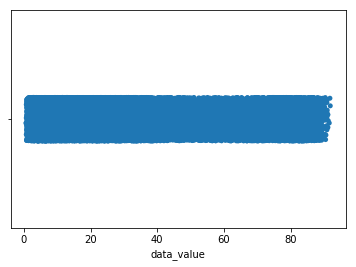

In [26]:
sns.stripplot(data=df, x='data_value')

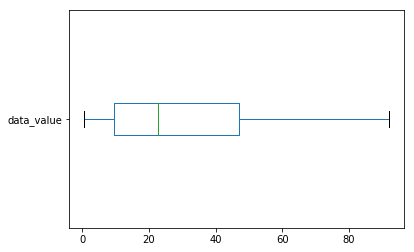

In [27]:
df[['data_value']].plot(kind='box', vert=False)

In [28]:
R=df.data_value.max() - df.data_value.min()

In [29]:
bins=int(R*(len(df)**(1/3)) / (3.49*df.data_value.std()))

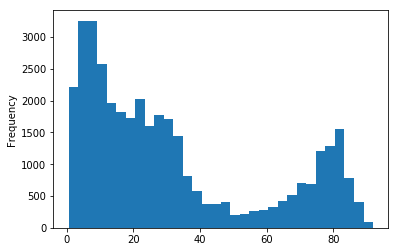

In [30]:
df.data_value.plot(kind='hist', bins=bins)

- The overall data seems to be skewed to the right
- There is a bimodal distribution
- Frequency starts to increase at around 50
- I wonder how this looks to different may change with different categories

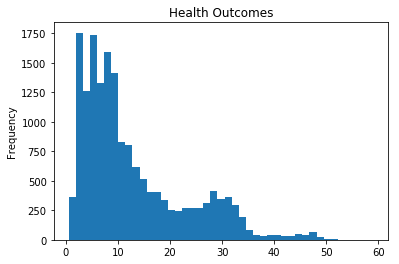

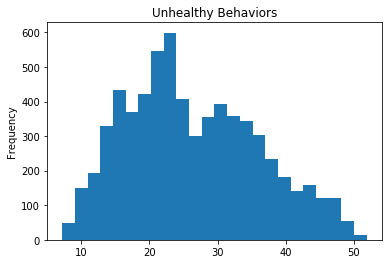

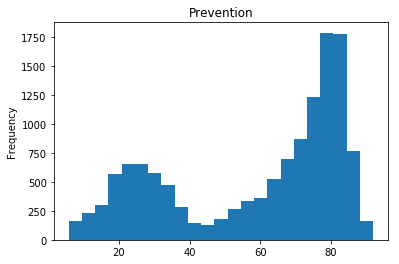

In [31]:
for ctgy in df.category.unique():
    tmp = df.copy()
    tmp = tmp[tmp.category==ctgy]
    R = tmp.data_value.max() - tmp.data_value.min()
    bins=int(R*(len(tmp)**(1/3)) / (3.49*tmp.data_value.std()))
    tmp.data_value.plot(kind='hist', bins=bins,title=ctgy)
    plt.show()

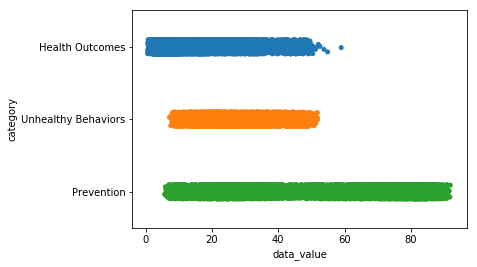

In [32]:
_=sns.stripplot(data=df, y='category',x='data_value')

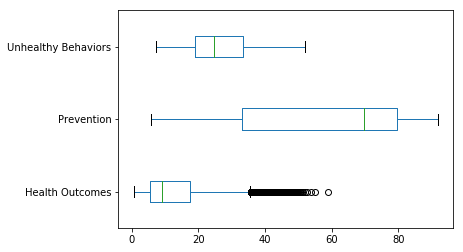

In [33]:
df[['data_value','category']].pivot(values='data_value',columns='category').plot(kind='box', showfliers=True, vert=False)

**totalpopulation**

In [34]:
df.head()

,year,locationname,category,measure,data_value,totalpopulation,measureid,short_question_text
0,2018,17031020500,Health Outcomes,Stroke among adults aged >=18 years,3.8,6214,STROKE,Stroke
1,2018,17031020901,Health Outcomes,Stroke among adults aged >=18 years,3.1,5221,STROKE,Stroke
2,2018,17031030300,Unhealthy Behaviors,Obesity among adults aged >=18 years,30.5,3322,OBESITY,Obesity
3,2018,17031030702,Health Outcomes,Stroke among adults aged >=18 years,2.4,1630,STROKE,Stroke
4,2018,17031040402,Unhealthy Behaviors,Obesity among adults aged >=18 years,23.8,4468,OBESITY,Obesity


In [35]:
df.totalpopulation.describe()

count    36792.000000
mean      3953.329528
std       1788.143987
min        237.000000
25%       2545.000000
50%       3848.000000
75%       5150.000000
max      16735.000000
Name: totalpopulation, dtype: float64

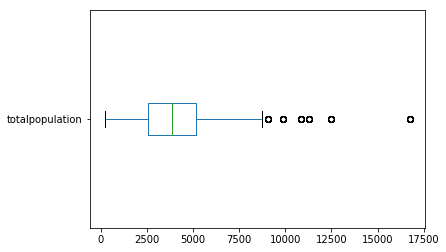

In [36]:
df[['totalpopulation']].plot(kind='box', vert=False)

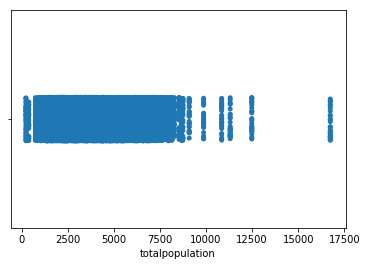

In [37]:
sns.stripplot(data=df, x='totalpopulation')

It looks like there is a large range in the total population variable, but there does not appear to be any outliers

**measureid**

In [38]:
df.measureid.unique()

array(['STROKE', 'OBESITY', 'ARTHRITIS', 'TEETHLOST', 'BINGE', 'DIABETES',
       'CERVICAL', 'LPA', 'DENTAL', 'PHLTH', 'CHD', 'BPMED', 'CASTHMA',
       'COREM', 'MHLTH', 'MAMMOUSE', 'COPD', 'COREW', 'BPHIGH',
       'CHOLSCREEN', 'HIGHCHOL', 'CANCER', 'KIDNEY', 'CSMOKING',
       'CHECKUP', 'ACCESS2', 'COLON_SCREEN', 'SLEEP'], dtype=object)

In [39]:
df.measureid.value_counts()

DIABETES        1314
CERVICAL        1314
COREM           1314
BPHIGH          1314
COLON_SCREEN    1314
ARTHRITIS       1314
CSMOKING        1314
ACCESS2         1314
CHD             1314
CASTHMA         1314
STROKE          1314
CANCER          1314
SLEEP           1314
MHLTH           1314
COREW           1314
PHLTH           1314
DENTAL          1314
KIDNEY          1314
CHECKUP         1314
COPD            1314
BPMED           1314
BINGE           1314
LPA             1314
CHOLSCREEN      1314
OBESITY         1314
TEETHLOST       1314
MAMMOUSE        1314
HIGHCHOL        1314
Name: measureid, dtype: int64

**short_question_text**

In [40]:
df.short_question_text.unique()

array(['Stroke', 'Obesity', 'Arthritis', 'Teeth Loss', 'Binge Drinking',
       'Diabetes', 'Cervical Cancer Screening', 'Physical Inactivity',
       'Dental Visit', 'Physical Health', 'Coronary Heart Disease',
       'Taking BP Medication', 'Current Asthma',
       'Core preventive services for older men', 'Mental Health',
       'Mammography', 'COPD', 'Core preventive services for older women',
       'High Blood Pressure', 'Cholesterol Screening', 'High Cholesterol',
       'Cancer (except skin)', 'Chronic Kidney Disease',
       'Current Smoking', 'Annual Checkup', 'Health Insurance',
       'Colorectal Cancer Screening', 'Sleep <7 hours'], dtype=object)

In [41]:
df.short_question_text.value_counts()

Sleep <7 hours                              1314
Dental Visit                                1314
Arthritis                                   1314
Colorectal Cancer Screening                 1314
Physical Health                             1314
Annual Checkup                              1314
Taking BP Medication                        1314
Current Smoking                             1314
High Cholesterol                            1314
Physical Inactivity                         1314
Current Asthma                              1314
Diabetes                                    1314
High Blood Pressure                         1314
Mental Health                               1314
Chronic Kidney Disease                      1314
Teeth Loss                                  1314
Core preventive services for older men      1314
Cervical Cancer Screening                   1314
Obesity                                     1314
COPD                                        1314
Cholesterol Screenin

Short question text is similar to measureid, we can remove one

In [42]:
df.drop('measureid',axis=1, inplace=True)

In [43]:
df.head()

,year,locationname,category,measure,data_value,totalpopulation,short_question_text
0,2018,17031020500,Health Outcomes,Stroke among adults aged >=18 years,3.8,6214,Stroke
1,2018,17031020901,Health Outcomes,Stroke among adults aged >=18 years,3.1,5221,Stroke
2,2018,17031030300,Unhealthy Behaviors,Obesity among adults aged >=18 years,30.5,3322,Obesity
3,2018,17031030702,Health Outcomes,Stroke among adults aged >=18 years,2.4,1630,Stroke
4,2018,17031040402,Unhealthy Behaviors,Obesity among adults aged >=18 years,23.8,4468,Obesity


In [55]:
df.groupby(['locationname','year','measure']).count().category.unique()

array([1], dtype=int64)

In [65]:
df.locationname.value_counts().unique()

array([28], dtype=int64)

In [66]:
df.measure.nunique()

28

There is one measure per year and census tract, and each census tract is listed once in the dataset

Once we have decided which measures to include, we will need to pivot the data

In [67]:
df.pivot(values='data_value',columns='measure',index='locationname').head()

measure,All teeth lost among adults aged >=65 years,Arthritis among adults aged >=18 years,Binge drinking among adults aged >=18 years,Cancer (excluding skin cancer) among adults aged >=18 years,Cervical cancer screening among adult women aged 21-65 years,Cholesterol screening among adults aged >=18 years,Chronic kidney disease among adults aged >=18 years,Chronic obstructive pulmonary disease among adults aged >=18 years,Coronary heart disease among adults aged >=18 years,Current asthma among adults aged >=18 years,...,No leisure-time physical activity among adults aged >=18 years,Obesity among adults aged >=18 years,"Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening","Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",Physical health not good for >=14 days among adults aged >=18 years,Sleeping less than 7 hours among adults aged >=18 years,Stroke among adults aged >=18 years,Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure,Visits to dentist or dental clinic among adults aged >=18 years,Visits to doctor for routine checkup within the past year among adults aged >=18 years
locationname,,,,,,,,,,,,,,,,,,,,,
17031010100,12.5,20.2,20.4,4.7,82.9,82.2,2.8,6.0,4.8,10.8,...,24.4,34.9,26.8,25.4,11.9,39.8,3.2,70.3,60.4,76.0
17031010201,16.6,19.7,20.6,4.2,79.9,79.6,3.0,6.9,5.2,11.0,...,29.6,36.4,24.2,22.9,14.0,41.2,3.3,67.5,52.7,73.4
17031010202,15.6,22.6,20.4,5.6,81.5,82.5,3.3,7.4,6.2,10.4,...,27.9,34.3,27.3,24.1,13.6,39.1,3.8,72.4,57.3,75.0
17031010300,13.1,22.6,20.8,6.3,82.4,83.0,3.1,6.7,6.1,9.7,...,24.8,31.1,29.9,24.8,12.0,36.6,3.5,73.3,62.8,75.4
17031010400,9.1,13.0,25.2,3.4,76.9,74.7,1.7,4.0,3.0,9.9,...,17.8,24.4,30.7,27.4,8.2,34.7,1.7,62.2,68.7,71.8


### still needed
- decide on measures to use
- match/filter census tracts

In [68]:
new_path = os.path.join(PROJ_ROOT, 
                         'data',
                         'interim',
                         '500_places.csv')
df.to_csv(new_path, index=False)